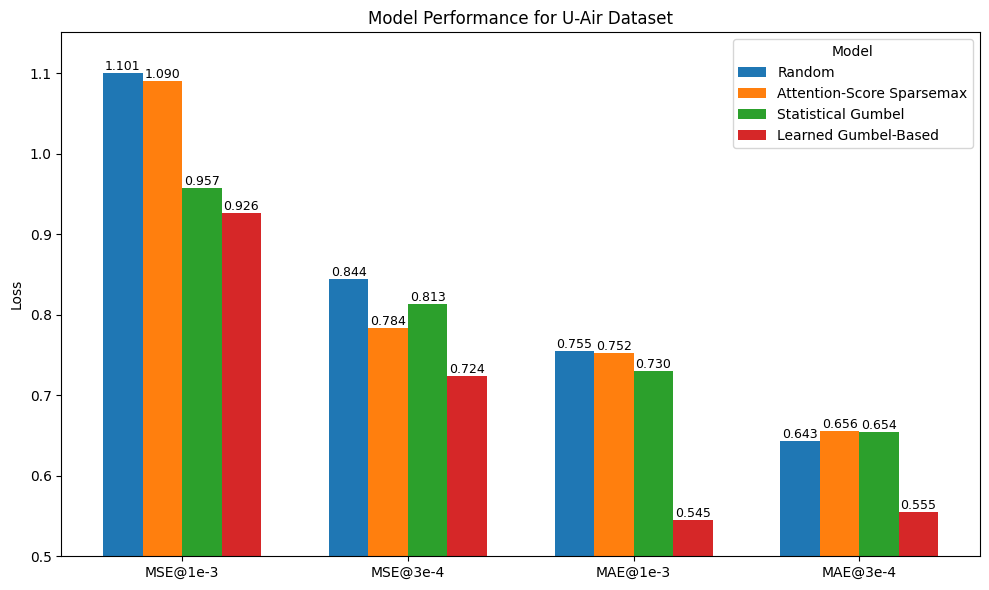

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dummy data
models = ['Random', 'Attention-Score Sparsemax', 'Statistical Gumbel', 'Learned Gumbel-Based']
metrics = ['MSE@1e-3', 'MSE@3e-4', 'MAE@1e-3', 'MAE@3e-4']

dummy_values = [
    1.101, 0.844, 0.755, 0.643,  # Random
    1.090, 0.784, 0.752, 0.656,  # Attention-Score Sparsemax
    0.957, 0.813, 0.730, 0.654,  # Statistical Gumbel
    0.926, 0.724, 0.545, 0.555   # Learned Gumbel-Based
]

df = pd.DataFrame([
    {'Model': models[i], 'Metric': metrics[j], 'Loss': dummy_values[i * len(metrics) + j]}
    for i in range(len(models)) for j in range(len(metrics))
])

# Use matplotlib for fine control with reduced inter-bar spacing
x = np.arange(len(metrics))
n_models = len(models)

# Original gap = 1 - old_cluster_width = 0.6
# Reduce this gap by half: new_gap = 0.6 * 0.5 = 0.3
new_cluster_width = 1 - 0.3  # = 0.7
bar_width = new_cluster_width / n_models
offsets = np.linspace(-new_cluster_width/2 + bar_width/2,
                      new_cluster_width/2 - bar_width/2,
                      n_models)

plt.figure(figsize=(10, 6))
for idx, model in enumerate(models):
    y = df[df.Model == model]['Loss'].values
    xi = x + offsets[idx]
    bars = plt.bar(xi, y, width=bar_width, label=model)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

plt.ylim(0.5, df['Loss'].max() + 0.05)
plt.xticks(x, metrics)
plt.ylabel('Loss')
plt.title('Model Performance for U-Air Dataset')
plt.legend(title='Model', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()


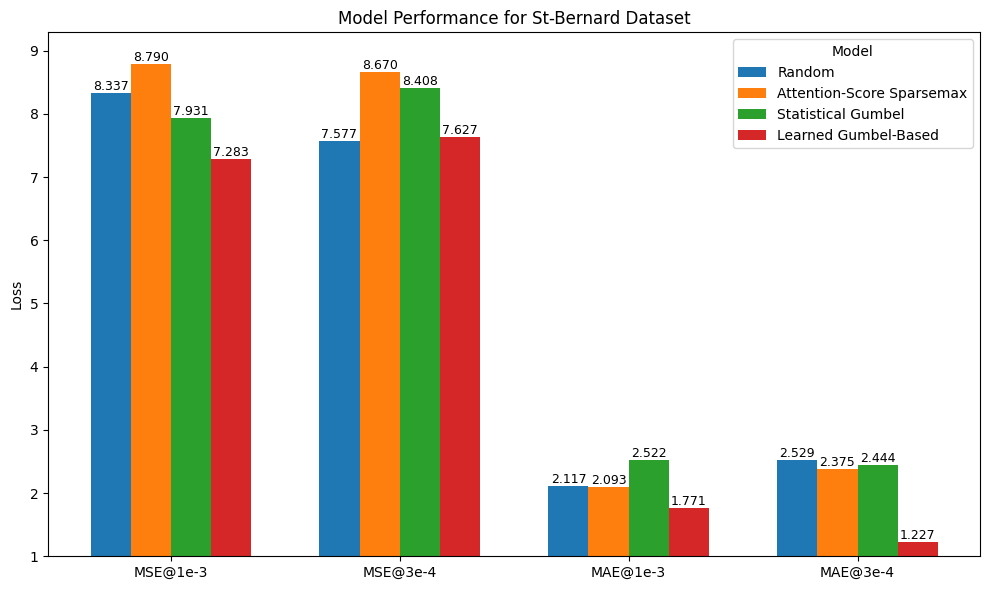

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dummy data
models = ['Random', 'Attention-Score Sparsemax', 'Statistical Gumbel', 'Learned Gumbel-Based']
metrics = ['MSE@1e-3', 'MSE@3e-4', 'MAE@1e-3', 'MAE@3e-4']

dummy_values = [
    8.337, 7.577, 2.117, 2.529,  # Random
    8.790, 8.670, 2.093, 2.375,  # Attention-Score Sparsemax
    7.931, 8.408, 2.522, 2.444,  # Statistical Gumbel
    7.283, 7.627, 1.771, 1.227   # Learned Gumbel-Based
]

df = pd.DataFrame([
    {'Model': models[i], 'Metric': metrics[j], 'Loss': dummy_values[i * len(metrics) + j]}
    for i in range(len(models)) for j in range(len(metrics))
])

# Use matplotlib for fine control with reduced inter-bar spacing
x = np.arange(len(metrics))
n_models = len(models)

# Original gap = 1 - old_cluster_width = 0.6
# Reduce this gap by half: new_gap = 0.6 * 0.5 = 0.3
new_cluster_width = 1 - 0.3  # = 0.7
bar_width = new_cluster_width / n_models
offsets = np.linspace(-new_cluster_width/2 + bar_width/2,
                      new_cluster_width/2 - bar_width/2,
                      n_models)

plt.figure(figsize=(10, 6))
for idx, model in enumerate(models):
    y = df[df.Model == model]['Loss'].values
    xi = x + offsets[idx]
    bars = plt.bar(xi, y, width=bar_width, label=model)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

# plt.ylim(0.5, df['Loss'].max() + 0.05)
plt.ylim(1, df['Loss'].max() + 0.5)
plt.xticks(x, metrics)
plt.ylabel('Loss')
plt.title('Model Performance for St-Bernard Dataset')
plt.legend(title='Model', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()


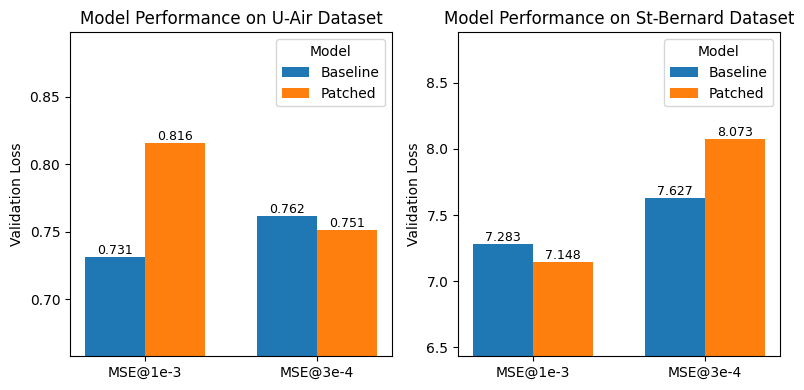

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = [[0.731, 0.816, 0.762, 0.751], [7.283, 7.148, 7.627, 8.073]]
models = ['Baseline', 'Patched']

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# First subplot
metrics = ['MSE@1e-3', 'MSE@3e-4']
x = np.arange(len(metrics))
n_models = len(models)
bar_width = 0.35
offsets = np.linspace(-bar_width/2, bar_width/2, n_models)

for i, dataset in enumerate(data):
    # dataset: [original@mse1e-3, patched@mse1e-3, original@mse3e-4, patched@mse3e-4]
    y = np.array([
        [dataset[0], dataset[2]],  # Original: mse1e-3, mse3e-4
        [dataset[1], dataset[3]]   # Patched: mse1e-3, mse3e-4
    ])
    # y shape: (2, 2), rows: [Original, Patched], cols: [mse1e-3, mse3e-4]
    for idx, model in enumerate(models):
        bars = axs[i].bar(x + offsets[idx], y[idx], width=bar_width, label=model)
        for bar in bars:
            axs[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(metrics)
    axs[i].set_ylabel('Validation Loss')
    axs[i].set_ylim(min(dataset) - 0.1*min(dataset), max(dataset) + 0.1*max(dataset))
    axs[i].legend(title='Model', loc='upper right', frameon=True)
    axs[i].set_title(f'Model Performance on {"U-Air" if i == 0 else "St-Bernard"} Dataset')

plt.tight_layout()
plt.savefig('patch_results.png', dpi=500)
plt.show()
